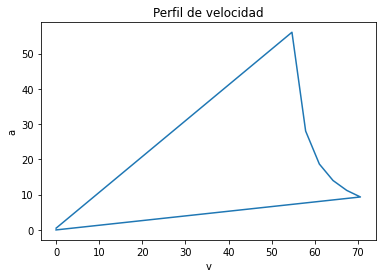

In [12]:
#Constantes del problema
import numpy as np
import matplotlib.pyplot as plt

Y_0 = 0.1 
Y_1 = 0.06
t_0 = 0
V_0 = 0.08
mu_liq= 1.26 #en este es posible poner la viscosidad de cualquier fluido, en este caso usamos la glicerina
mu_agua= 1
#Hallamos el esfuerzo cortante para ambos liquidos
tao_1 = (mu_agua)*(V_0)/(Y_1)
tao_2 = (mu_liq)*(V_0)/(Y_0 - Y_1)
#Hallamos el gradiente de presión
gpre_agua = (mu_agua)*(((0.08)**2)/(Y_1)**2) 
gpre_liq = (mu_liq)*(((0.08)**2)/(Y_0-Y_1)**2)
gpre_Tot =  Dp_Dx_agua + Dp_Dx_liq
#Encontramos el flujo
Q_1= (((Y_1*2)/(2* mu_agua))*(tao_1))-((Y_1*3)/(3* mu_agua))*(gpre_Tot)
Q_2= ((((Y_0-Y_1-Y_0)*2)/(2*mu_liq))*tao_2)-(((Y_0-Y_1-Y_0)**3)/(3* mu_liq))*(gpre_Tot)
#Velocidad de fase en distancia
n = 7
v= np.zeros(n+1)
v[0] = 0.02
v[1] = 0.04
v[2] = 0.06
#para el agua
for i in range(1, n):v[i]= (((i**2)/ (2*mu_agua))*(tao_1))+(((i**3)/(3* mu_agua))*(gpre_Tot))
#para el segundo liquido
for j in range(1, n):v[j]= ((j*2/2*mu_liq)*(tao_2))+(i*3/3* mu_liq)*(gpre_Tot)
#Velocidad de fase en tiempo
m=7
a= np.zeros(m+1)
a[0]= 0.5
a[1]= 1
a[2]= 1.5
#para el agua
for b in range(1,m):
  a[b]= v[i]/(b* mu_agua)
#Para el segundo liquido
for c in range(1,m):
  a[c]= v[j]/(c* mu_liq)
plt.plot(v,a)

plt.xlabel('v')
plt.ylabel('a')
plt.title('Perfil de velocidad')
plt.show()

